In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('13-part-ii-finance-using-regressions-for-financial-analysis/attached_files/073-the-fundamentals-of-simple-regression-analysis/Housing-Data.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Unnamed: 0      0 non-null float64
Housing Data    6 non-null object
Unnamed: 2      6 non-null object
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [4]:
data.tail()

,Unnamed: 0,Housing Data,Unnamed: 2
4,NaN,673,950000
5,NaN,785,454000
6,NaN,900,1.27043e+06
7,NaN,599,350000
8,NaN,975,900000


In [5]:
data

,Unnamed: 0,Housing Data,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,Size,Price
4,NaN,673,950000
5,NaN,785,454000
6,NaN,900,1.27043e+06
7,NaN,599,350000
8,NaN,975,900000


In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
data=data.drop([0,1,2,3],axis=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 4 to 8
Data columns (total 2 columns):
Housing Data    5 non-null object
Unnamed: 2      5 non-null object
dtypes: object(2)
memory usage: 120.0+ bytes


In [9]:
data= data.rename({'Housing Data':'Size','Unnamed: 2':'Prize'}, axis='columns') 

In [10]:
data

,Size,Prize
4,673,950000
5,785,454000
6,900,1.27043e+06
7,599,350000
8,975,900000


In [11]:
data=data.reset_index(drop=True)

In [12]:
data

,Size,Prize
0,673,950000
1,785,454000
2,900,1.27043e+06
3,599,350000
4,975,900000


In [13]:
X=data['Size']
Y=data['Prize']

In [14]:
X

0    673
1    785
2    900
3    599
4    975
Name: Size, dtype: object

Univariate Regression:

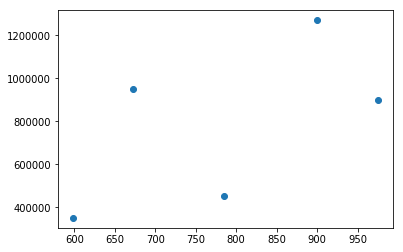

In [15]:
plt.scatter(X,Y)
plt.show()

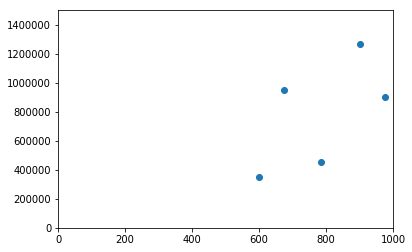

In [16]:
plt.scatter(X,Y)
plt.axis([0,1000,0,1500000])
plt.show()

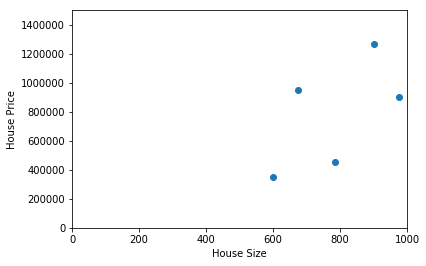

In [17]:
plt.scatter(X,Y)
plt.axis([0,1000,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size')
plt.show()

In [18]:
data_reg= pd.read_excel('13-part-ii-finance-using-regressions-for-financial-analysis/attached_files/076-computing-alpha-beta-and-r-squared-in-python/Housing.xlsx')

In [19]:
Y_reg=data_reg['House Price']
X_reg=data_reg['House Size (sq.ft.)']

In [20]:
X_reg

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

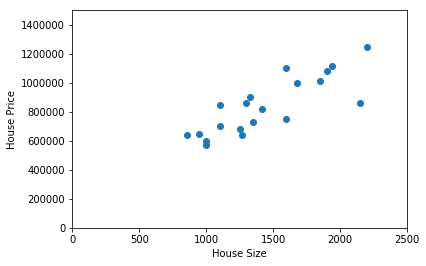

In [21]:
plt.scatter(X_reg,Y_reg)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size')
plt.show()

In [22]:
X1=sm.add_constant(X_reg)
reg=sm.OLS(Y_reg,X1).fit()

/root/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           8.13e-06
Time:                        11:51:56   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
slope,intecept,r_value,p_value,std_err=stats.linregress(X_reg,Y_reg)

In [25]:
slope

401.91628631922595

In [26]:
intecept

260806.2360560964

In [27]:
r_value

0.8235775534696924

In [28]:
p_value

8.129642377231308e-06

In [29]:
std_err

65.24299510636492